# Sparsification

In [ ]:
from data.types import SparsityValue
from tasks.optic_disc_cup.datasets import RimOneDataset

rim_one_sparsity_params: dict = {
    'point_dot_size': 5,
    'grid_dot_size': 4,
    'contour_radius_dist': 4,
    'contour_radius_thick': 2,
    'skeleton_radius_thick': 4,
    'region_compactness': 0.5
}

rim_one_data = RimOneDataset(
    mode='train',
    num_classes=3,
    num_shots=5,
    resize_to=(256, 256),
    split_seed=0,
    sparsity_params=rim_one_sparsity_params
)

sparsity_values: dict[str, SparsityValue] = {
    'point': 10,
    'grid': 20,
    'contour': 1,
    'skeleton': 1,
    'region': 1,
    'point_old': 10,
    'grid_old': 20
}
image, mask, sparse_masks, image_filename = rim_one_data.get_data_with_sparse_all(0, sparsity_values)

[0 1 2] [False  True] [False  True]


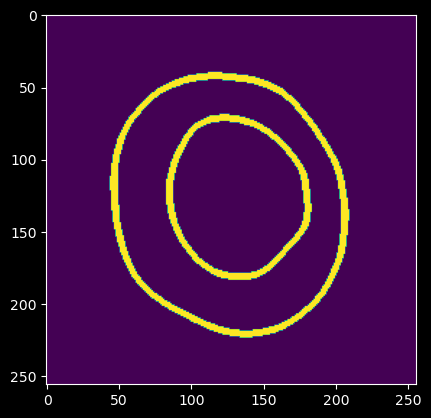

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature, morphology

edge_mask = feature.canny(mask.astype(np.float64))
edge_mask_dilated = morphology.binary_dilation(edge_mask, footprint=morphology.disk(2))

print(np.unique(mask), np.unique(edge_mask), np.unique(edge_mask_dilated))
plt.imshow(edge_mask_dilated)

# File Processing

## Mixed Print and Log

In [29]:
# log_file_ori = open('outputs/protoseg_long_rimone_to_drishti/learn_log_ori.txt', 'r')
# log_file = open('outputs/protoseg_long_rimone_to_drishti/learn_log.txt', 'w')
# 
# for i in range(1, 4900):
#     line = log_file_ori.readline()
#     
#     if not line.startswith('INFO'):
#         continue
#     
#     log_file.write(line.removeprefix('INFO:root:'))
# 
# log_file_ori.close()
# log_file.close()

## Exp Name Update

In [1]:
from config.config_type import AllConfig
import json, os

def change_exp_name(old_name: str, new_name: str, output_path: str, checkpoint_path: str, config_filename: str) -> None:
    os.rename(os.path.join(output_path, old_name), os.path.join(output_path, new_name))
    os.rename(os.path.join(checkpoint_path, old_name), os.path.join(checkpoint_path, new_name))

    config_filepath = os.path.join(output_path, new_name, config_filename)
    with open(config_filepath, 'r') as config_file:
        config: AllConfig = json.load(config_file)
        
    config['learn']['exp_name'] = new_name
    with open(config_filepath, 'w') as config_file:
        json.dump(config, config_file, indent=4)

In [3]:
# change_exp_name('PS RO-DR short v2 proper-split', 'PS RO-DR short v2- proper-split', 'outputs', 'ckpt', 'config.json')

for exp_name in filter(lambda x: 'v2-' in x, os.listdir('outputs')):
    change_exp_name(exp_name, exp_name.replace('v2-', 'v2'), 'outputs', 'ckpt', 'config.json')

## GPU Usage

In [45]:
import torch

print(torch.cuda.get_device_properties(0).total_memory)
print(torch.cuda.memory_reserved(0))
print(torch.cuda.memory_allocated(0))
print(torch.cuda.memory_stats(0))

2147352576
0
0
OrderedDict([('active.all.allocated', 0), ('active.all.current', 0), ('active.all.freed', 0), ('active.all.peak', 0), ('active.large_pool.allocated', 0), ('active.large_pool.current', 0), ('active.large_pool.freed', 0), ('active.large_pool.peak', 0), ('active.small_pool.allocated', 0), ('active.small_pool.current', 0), ('active.small_pool.freed', 0), ('active.small_pool.peak', 0), ('active_bytes.all.allocated', 0), ('active_bytes.all.current', 0), ('active_bytes.all.freed', 0), ('active_bytes.all.peak', 0), ('active_bytes.large_pool.allocated', 0), ('active_bytes.large_pool.current', 0), ('active_bytes.large_pool.freed', 0), ('active_bytes.large_pool.peak', 0), ('active_bytes.small_pool.allocated', 0), ('active_bytes.small_pool.current', 0), ('active_bytes.small_pool.freed', 0), ('active_bytes.small_pool.peak', 0), ('allocated_bytes.all.allocated', 0), ('allocated_bytes.all.current', 0), ('allocated_bytes.all.freed', 0), ('allocated_bytes.all.peak', 0), ('allocated_bytes

In [8]:
nvidia_smi_text = b'Thu Dec 21 07:17:44 2023       \n+-----------------------------------------------------------------------------+\n| NVIDIA-SMI 450.191.01   Driver Version: 450.191.01   CUDA Version: 11.0     |\n|-------------------------------+----------------------+----------------------+\n| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |\n| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |\n|                               |                      |               MIG M. |\n|===============================+======================+======================|\n|   0  Tesla V100-SXM2...  On   | 00000000:8A:00.0 Off |                    0 |\n| N/A   44C    P0   199W / 300W |  10256MiB / 32510MiB |     51%      Default |\n|                               |                      |                  N/A |\n+-------------------------------+----------------------+----------------------+\n                                                                               \n+-----------------------------------------------------------------------------+\n| Processes:                                                                  |\n|  GPU   GI   CI        PID   Type   Process name                  GPU Memory |\n|        ID   ID                                                   Usage      |\n|=============================================================================|\n+-----------------------------------------------------------------------------+\n'

# extract memory usage and available memory


In [34]:
import re

# command = 'nvidia-smi'
# nvidia_smi_text = subprocess.check_output(command)
[used_ram, total_ram] = re.findall(r'\b\d+MiB', str(nvidia_smi_text))
used_ram = int(used_ram[:-3])
total_ram = int(total_ram[:-3])
percent_ram = used_ram * 100 / total_ram

percent_ram, total_ram

(0.0, 2048)

# Error Logging

In [1]:
import logging
# import sys
# import traceback
import time

In [2]:
logging.basicConfig(filename='test.log',
                    encoding='utf-8',
                    level=logging.INFO,
                    format='%(asctime)s | %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S',
                    force=True)

In [ ]:
try:
    for i in range(1000):
        logging.info(i)
        time.sleep(1)
except BaseException as e:
    # traceback.print_exception(*sys.exc_info())
    # logging.warning(traceback.format_exc())
    # logging.error(traceback.format_exc())
    logging.error("Exception:", exc_info=True, stack_info=True)
    raise e
finally:
    logging.info('End')
    logger = logging.getLogger()
    while logger.hasHandlers():
        logger.removeHandler(logger.handlers[0])

# Other